In [54]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa
%matplotlib inline

import import_ipynb
import plotting

### Collect file names and labels

In [55]:
wav_path = 'C://Users//richard//OneDrive//Documents//Audacity//wavfiles//'
files_path = 'C://Users//richard//OneDrive//Documents//Audacity//audio_classes.csv'

In [56]:
df = pd.read_csv(files_path)
df.head()

,file_name,label
0,music_plus_noise1.wav,music_noise
1,music_plus_noise2.wav,music_noise
2,music_twintones1.wav,music_noise
3,music_plus_speech1.wav,music_speech
4,music1.wav,music


In [57]:
#df.info()
df.label.value_counts()

noise              6
speech_wb_noise    6
speech_wb          6
speech_nb          6
music              5
speech_nb_noise    4
music_noise        3
music_speech       1
Name: label, dtype: int64

In [58]:
df = df.set_index('file_name')

In [59]:
df.head()

,label
file_name,
music_plus_noise1.wav,music_noise
music_plus_noise2.wav,music_noise
music_twintones1.wav,music_noise
music_plus_speech1.wav,music_speech
music1.wav,music


### Add some time information 

In [60]:
for f in df.index:
    rate,signal = wavfile.read(wav_path + f)
    df.at[f,'length'] = signal.shape[0]/rate

C:\Users\richard\Anaconda3\envs\tf15\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [61]:
df.head()

,label,length
file_name,,
music_plus_noise1.wav,music_noise,7.543288
music_plus_noise2.wav,music_noise,6.991315
music_twintones1.wav,music_noise,5.944308
music_plus_speech1.wav,music_speech,4.768209
music1.wav,music,2.018050


In [62]:
classes = list(set(df.label.values))
classes

['music',
 'music_noise',
 'speech_wb_noise',
 'music_speech',
 'speech_nb',
 'speech_wb',
 'speech_nb_noise',
 'noise']

In [63]:
#group by audio length
class_dist = df.groupby('label')['length'].mean()

In [64]:
class_dist.sort_values(ascending=False)

label
music_noise        6.826304
music_speech       4.768209
speech_nb_noise    2.947545
noise              2.823212
speech_wb_noise    2.554422
music              1.955057
speech_nb          1.409063
speech_wb          1.223050
Name: length, dtype: float64

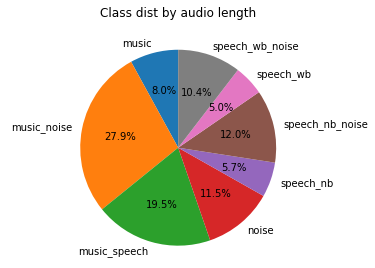

In [65]:
fig,ax = plt.subplots()
ax.set_title('Class dist by audio length',y=1.08)
ax.pie(class_dist,labels=class_dist.index,autopct='%1.1f%%',shadow=False,startangle=90)
ax.axis('equal')
plt.show()

In [66]:
len(df)

37

In [67]:
df.index

Index(['music_plus_noise1.wav', 'music_plus_noise2.wav',
       'music_twintones1.wav', 'music_plus_speech1.wav', 'music1.wav',
       'music2.wav', 'music3.wav', 'music4.wav', 'music5.wav', 'noise1.wav',
       'noise2.wav', 'noise3.wav', 'noise4.wav', 'noise5.wav', 'noise6.wav',
       'speech_nb_plus_noise1.wav', 'speech_nb_plus_noise2.wav',
       'speech_nb_plus_noise3.wav', 'speech_nb_plus_noise4.wav',
       'speech_nb1.wav', 'speech_nb2.wav', 'speech_nb3.wav', 'speech_nb4.wav',
       'speech_nb5.wav', 'speech_nb6.wav', 'speech_wb_plus_noise1.wav',
       'speech_wb_plus_noise2.wav', 'speech_wb_plus_noise3.wav',
       'speech_wb_plus_noise4.wav', 'speech_wb_plus_noise5.wav',
       'speech_wb_plus_noise6.wav', 'speech_wb1.wav', 'speech_wb2.wav',
       'speech_wb3.wav', 'speech_wb4.wav', 'speech_wb5.wav', 'speech_wb6.wav'],
      dtype='object', name='file_name')

In [68]:
df.reset_index(inplace=True)

In [69]:
df.index

RangeIndex(start=0, stop=37, step=1)

### Look at frequency plots and MFCC info

In [70]:
def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n,d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return (Y,freq)

In [71]:
#make dictionaries for each of the instrument values
signals = {}; fft={}; fbank={}; mfccs={};

#1s/40 = 25ms (window size)
time_per_sec = 40;
nfft = int(44100/time_per_sec)+1

#get first entry for each class for display purposes
for c in classes:
    wav_file = df[df.label==c].iloc[0,0]
    signal, rate = librosa.load(wav_path + wav_file,sr=44100 )
    signals[c] = signal
    fft[c] = calc_fft(signal,rate)
    bank = logfbank(signal[:rate],rate,nfilt=26,nfft=nfft).T     #x sec of audio, N filters
    fbank[c] = bank
    mel = mfcc(signal[:rate],rate,numcep = 26, nfilt=26,nfft=nfft).T   #keep N cepstrals after dct
    mfccs[c] = mel

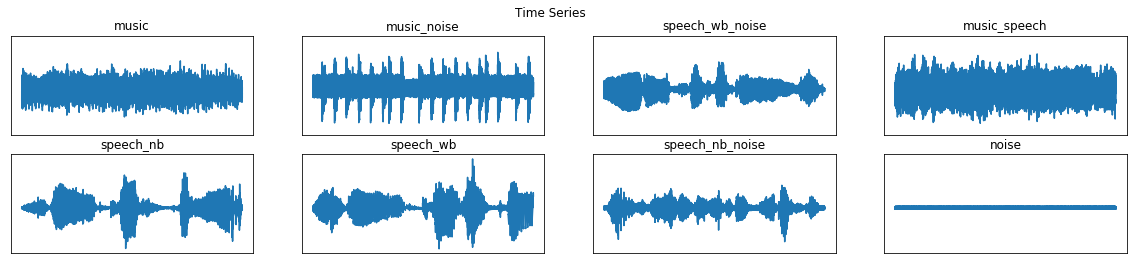

In [72]:
#call plotting function
plotting.plot_signals(signals)
plt.show()

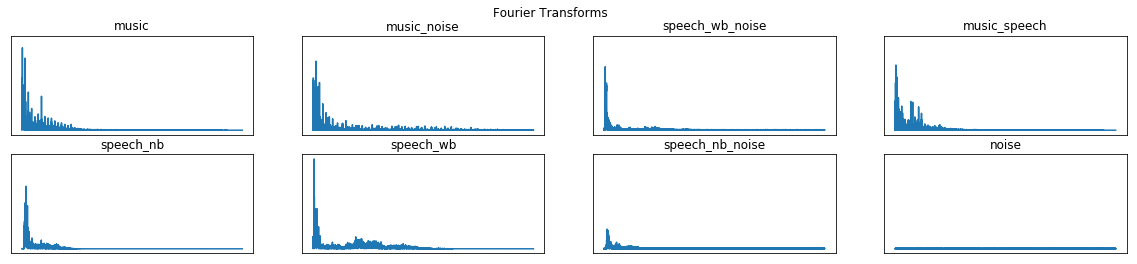

In [73]:
plotting.plot_fft(fft)
plt.show()

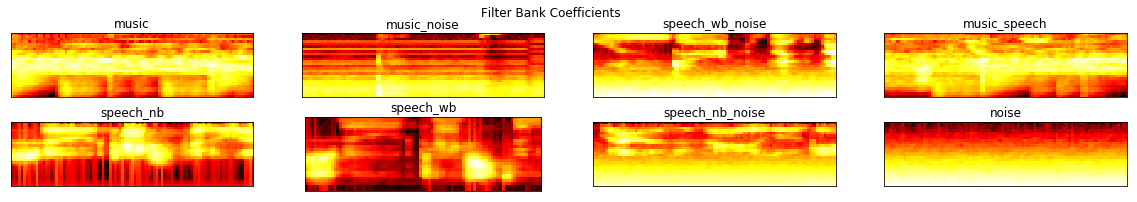

In [74]:
plotting.plot_fbank(fbank)
plt.show()

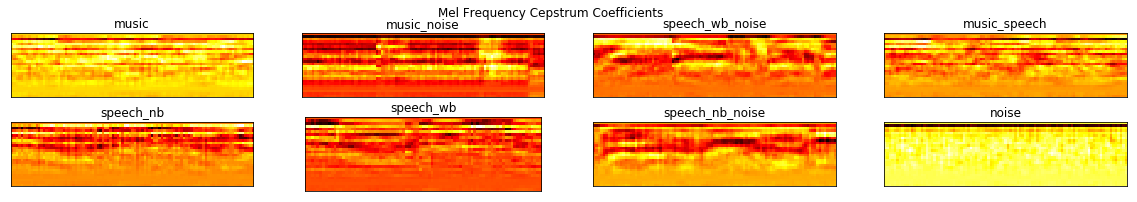

In [75]:
plotting.plot_mfccs(mfccs)
plt.show()